### Things to learn
- TypedDict schema
- DataClasses schema
- Pydantic for schemas

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from typing_extensions import TypedDict
from typing import Literal
class TypedDictClass(TypedDict):
    name : str
    mood : Literal["Happy", "Sad"]

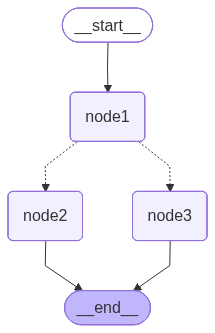

In [49]:
from langgraph.graph import START, END, StateGraph
import random
from IPython.display import display, Image

def node1(state):
    print("***Node-1***")
    return {"name": state["name"]+ "is ..."}

def node2(state):
    print("***Node2***")
    return {"mood" : "Happy"}

def node3(state):
    print("***Node3***")
    return {"mood" : "Sad"}

def decide_mood(state) -> Literal["node2", "node3"]:

    if random.random() > 0.5:
        return "node2"
    else:
        return "node3"
    
builder = StateGraph(TypedDictClass)

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_mood)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [45]:
graph.invoke({"name" : "Junaid"})

***Node-1***
***Node2***


{'name': 'Junaidis ...', 'mood': 'Happy'}

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


### DATACLASSES

In [46]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    name : str
    mood :Literal["Happy", "Sad"]

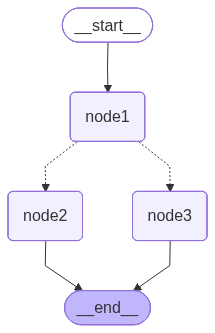

In [50]:
from langgraph.graph import START, END, StateGraph
import random
from IPython.display import display, Image

def node1(state):
    print("***Node-1***")
    return {"name": state.name + "is ..."}

    
builder = StateGraph(DataClassState)

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_mood)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graphDC = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
#Invoking

graphDC.invoke(DataClassState(name = "Ayaan", mood = "Happy"))

***Node-1***
***Node2***


{'name': 'Ayaanis ...', 'mood': 'Happy'}

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


### Pydantic validation

In [58]:
from pydantic import BaseModel, ValidationError, field_validator

class PydanticState(BaseModel):
    name : str
    mood : str

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        if value not in ["Happy", "Sad"]:
            raise ValueError("Value must either be Happy or Sad")
        return value
    
try:
    state = PydanticState(name="Alice", mood="Excited")
except ValidationError as e:
    print("Validation Error:", e)

Validation Error: 1 validation error for PydanticState
mood
  Value error, Value must either be Happy or Sad [type=value_error, input_value='Excited', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/value_error


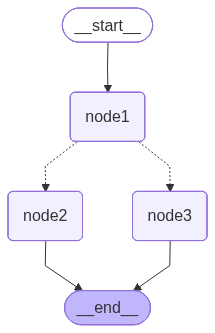

In [59]:
builder = StateGraph(PydanticState)

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_mood)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graphPyd = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [62]:
graphPyd.invoke(PydanticState(name="Lance", mood = "Happy"))

***Node-1***
***Node2***


{'name': 'Lanceis ...', 'mood': 'Happy'}

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
